In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from autocorrect import Speller
from spellchecker import SpellChecker
import time
from datetime import datetime 
import spacy
from textblob import TextBlob 

from nltk.corpus import words
from nltk.metrics.distance import jaccard_distance
from nltk.util import ngrams
from nltk.metrics.distance  import edit_distance

from nltk.stem import PorterStemmer 
from textblob import Word 
from nltk.stem import WordNetLemmatizer 

import wordcloud
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import squarify 
import seaborn as sns

start_program = datetime.now() 

In [2]:
ttw = pd.read_csv('ttw2_finalSpell.csv')
ttw.dropna(inplace=True)

In [3]:
#4.1

#first cleaning of data from lab1
#take and return dataframe

def first_cleaning(ttw):
    start_time = datetime.now() 
    stop_words = set(stopwords.words('english'))
    ttw2 = ttw.copy()
    ttw2['tweet'] = ttw2['tweet'].str.lower()
    ttw2['tweet'] = ttw2['tweet'].str.replace(r'(\s)#\w+',' ') 
    ttw2['tweet'] = ttw2['tweet'].str.replace('[^\w\s]','') 
    ttw2['tweet'] = ttw2['tweet'].str.replace('[^a-z ]','') 
    ttw2['tweet'] = ttw2['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
    print('Time after first cleaning in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))
    return ttw2


#TOKENIZATION WITH NLTK
#function that take dataframe and return our first dictionary as list data structure

def myDictFunc(ttw):
    dic = set()
    start_time = datetime.now() 
    for i in ttw['tweet']:
        nltk_tokens = nltk.word_tokenize(i)
        for x in nltk_tokens:
            dic.add(x)
    print('Time after dict creation in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))
    return list(dic) 


#4.2




#A graph to know ratio between num of letters per each word
#We use it to see the difference of words lengh beefore and after stemming and lemmatization

def firstGraph(dic):
    start_time = datetime.now() 
    NumOf_Let = []
    NumOfWord = []
    for t in dic:
        NumOf_Let.append(len(t))
        NumOfWord.append(dic.index(t))

    plt.scatter(NumOfWord, NumOf_Let)
    plt.style.use('default')
    plt.xlabel('Word')
    plt.ylabel('Num Of Letters')
    plt.title('Letters per each word in our dictionary')
    plt.show()
    print('Time after first graph execute in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))
    
    
#Wordcloud
#With this graph we can see amounth of the words
#We use it to see the difference of words amounth before and after stemming and lemmatization

def wordcloudGraph(dic):
    start_time = datetime.now()
# Create and generate a word cloud image:
    wordcloud = WordCloud(max_words=50, background_color="white", collocations=False).generate(" ".join(dic))
# Display the generated image:
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Most recent words in our dictionary')
    plt.axis("off")
    plt.show()
    print('Time after wordcloud graph execute in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))

    
    
#LEMMATIZATION WITH TEXTBLOB

def myLemmatize(dic):
    start_time = datetime.now()  
    dic = [Word(word).lemmatize() for word in dic]
    print('Time after lemmatization in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))
    return dic



#STEMMING WITH NLTK

def myStemm(dic):
    start_time = datetime.now() 
    ps = PorterStemmer() 
    emp = [ps.stem(w) for w in dic]
    print('Time after stemming in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))
    return emp


#3.6
#spellchecker
#spell function for fast spelling operations on our dictionary

def mySpeller(dic):
    start_time = datetime.now() 
    spell = Speller(lang='en')
    words_after_speller = [spell(word) for word in dic]
    print('Time after spelling dictionary in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_time))
    
    return words_after_speller

In [4]:
ttw_after_first_cleaning = first_cleaning(ttw)

Time after first cleaning in (hh:mm:ss.ms): "0:00:00.270976"


Time after dict creation in (hh:mm:ss.ms): "0:00:02.787186"


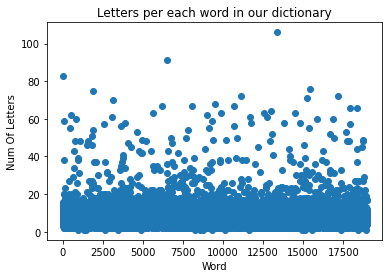

Time after first graph execute in (hh:mm:ss.ms): "0:00:03.386625"


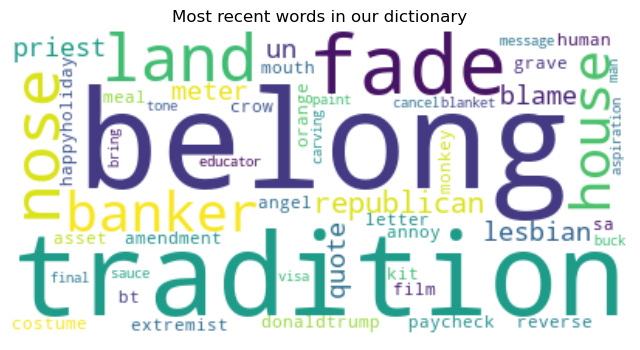

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.488499"
Time after lemmatization in (hh:mm:ss.ms): "0:00:01.900611"


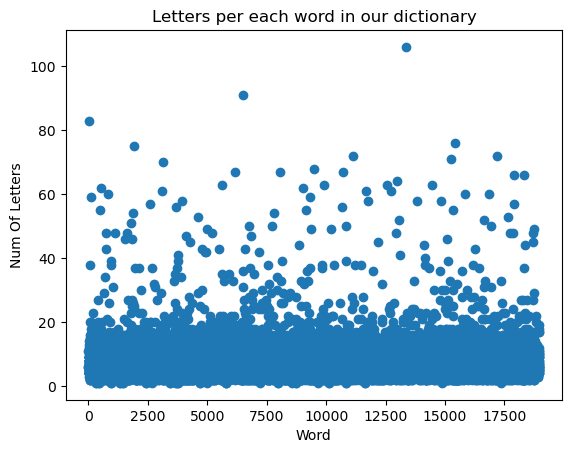

Time after first graph execute in (hh:mm:ss.ms): "0:00:02.834614"


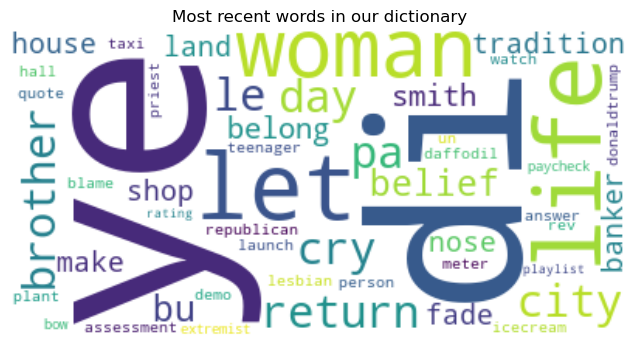

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.395485"
Time after stemming in (hh:mm:ss.ms): "0:00:00.404768"


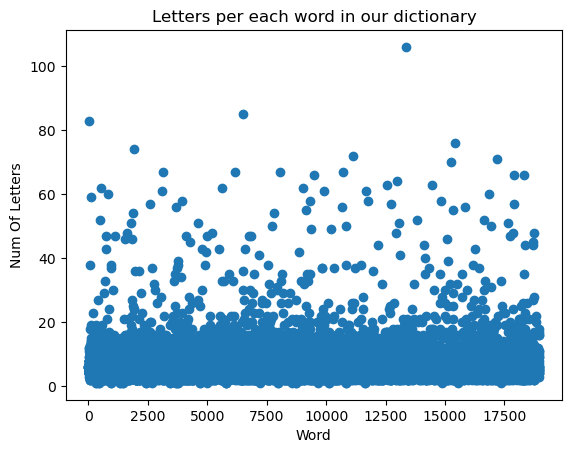

Time after first graph execute in (hh:mm:ss.ms): "0:00:02.214523"


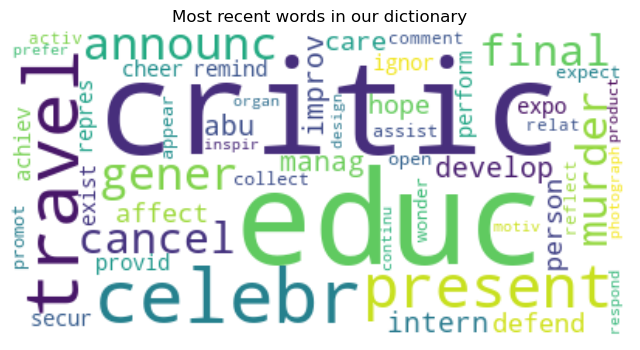

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.418760"
Time after spelling dictionary in (hh:mm:ss.ms): "0:19:35.602796"


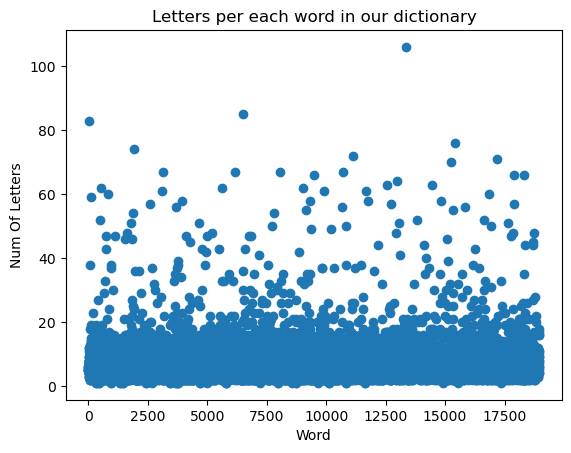

Time after first graph execute in (hh:mm:ss.ms): "0:00:02.071959"


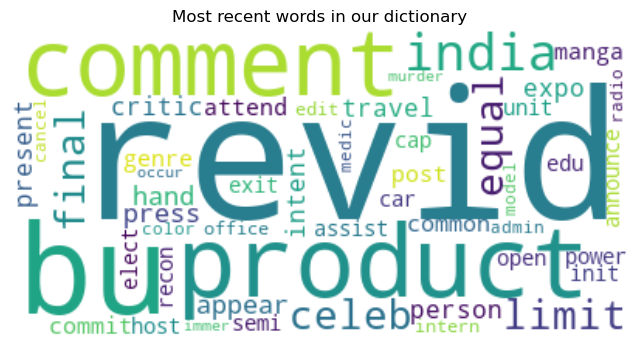

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.477000"
Lenght of second dictionary is:  13258


In [5]:
#First try
#4.1

my_dict = myDictFunc(ttw_after_first_cleaning)
firstGraph(my_dict)
wordcloudGraph(my_dict)

dic_after_lemma = myLemmatize(my_dict)
firstGraph(dic_after_lemma)
wordcloudGraph(dic_after_lemma)

dic_after_stemm = myStemm(dic_after_lemma)
firstGraph(dic_after_stemm)
wordcloudGraph(dic_after_stemm)

dic_after_spelling = mySpeller(dic_after_stemm)
firstGraph(dic_after_spelling)
wordcloudGraph(dic_after_spelling)

firstDict = set(dic_after_spelling)
print('Lenght of second dictionary is: ', len(firstDict))

Time after dict creation in (hh:mm:ss.ms): "0:00:02.764392"


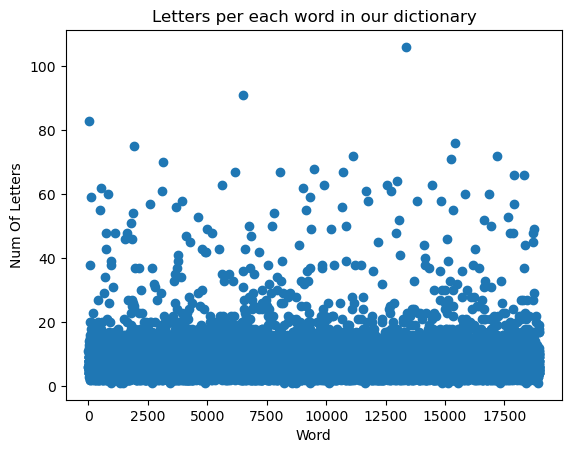

Time after first graph execute in (hh:mm:ss.ms): "0:00:03.000557"


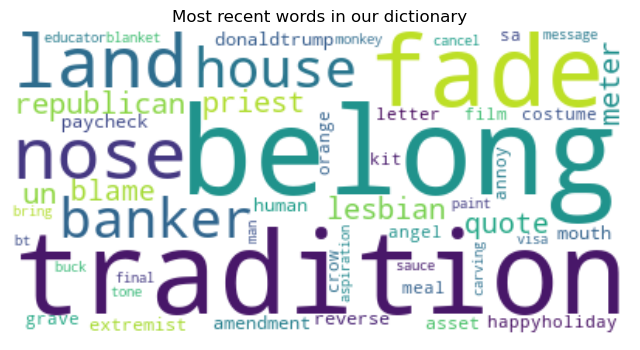

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.413684"
Time after lemmatization in (hh:mm:ss.ms): "0:00:00.112244"


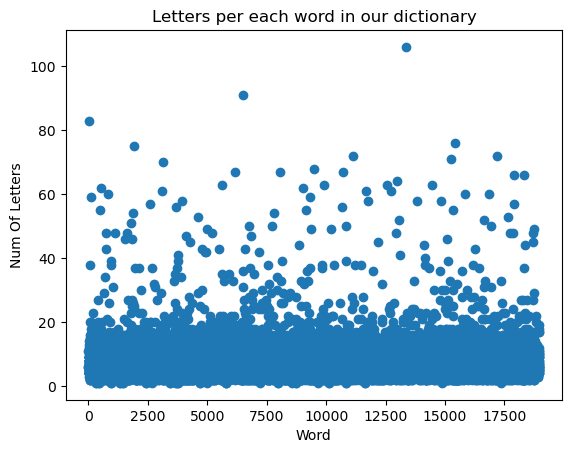

Time after first graph execute in (hh:mm:ss.ms): "0:00:02.813987"


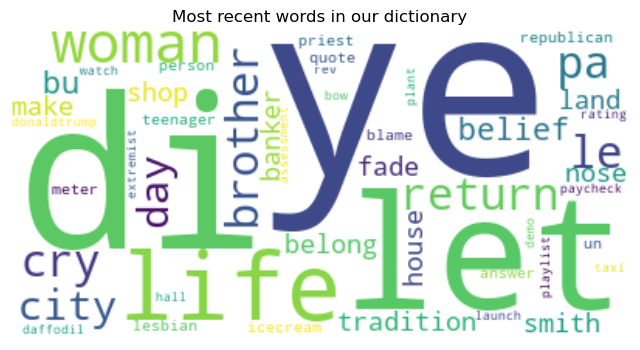

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.353761"
Time after spelling dictionary in (hh:mm:ss.ms): "0:20:53.781138"


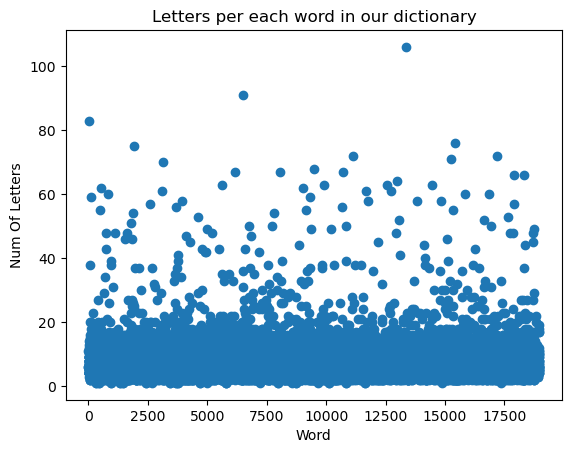

Time after first graph execute in (hh:mm:ss.ms): "0:00:02.842837"


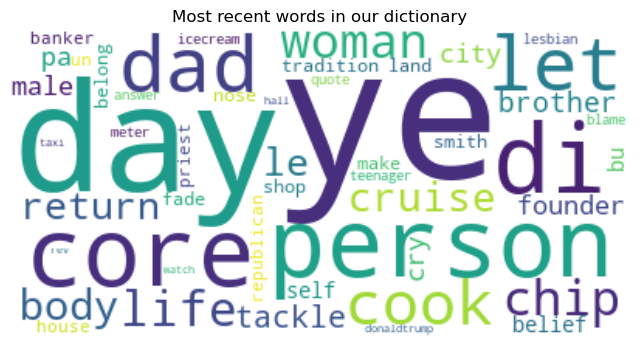

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.401996"
Time after stemming in (hh:mm:ss.ms): "0:00:00.400789"


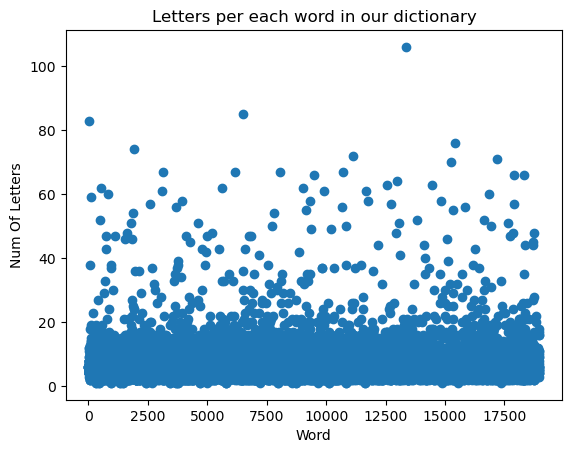

Time after first graph execute in (hh:mm:ss.ms): "0:00:02.165990"


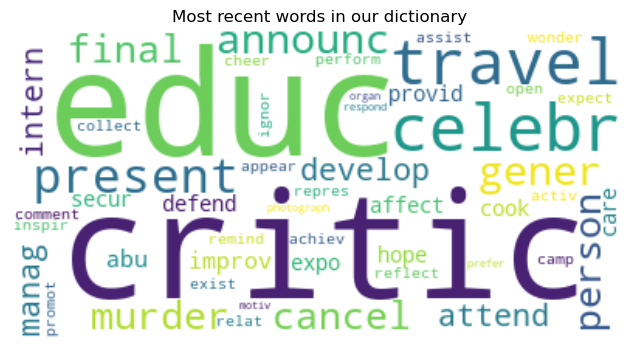

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.394872"
Lenght of second dictionary is:  14252


In [6]:
#Second try


my_dict2 = myDictFunc(ttw_after_first_cleaning)

firstGraph(my_dict2)
wordcloudGraph(my_dict2)

dic_after_lemma2 = myLemmatize(my_dict2)
firstGraph(dic_after_lemma2)
wordcloudGraph(dic_after_lemma2)

dic_after_spelling2 = mySpeller(dic_after_lemma2)
firstGraph(dic_after_spelling2)
wordcloudGraph(dic_after_spelling2)

dic_after_stemm2 = myStemm(dic_after_spelling2)
firstGraph(dic_after_stemm2)
wordcloudGraph(dic_after_stemm2)

secondDict = set(dic_after_stemm2)
print('Lenght of second dictionary is: ', len(secondDict))

Time after dict creation in (hh:mm:ss.ms): "0:00:02.793720"


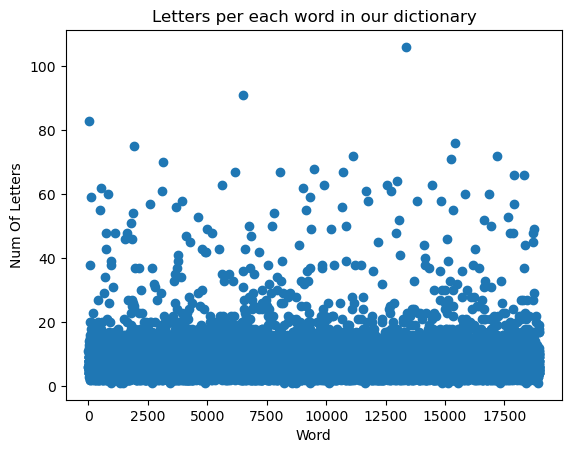

Time after first graph execute in (hh:mm:ss.ms): "0:00:03.361940"


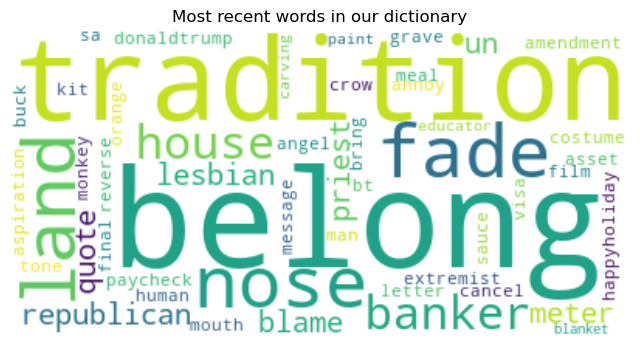

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.470731"
Time after spelling dictionary in (hh:mm:ss.ms): "0:21:04.316089"


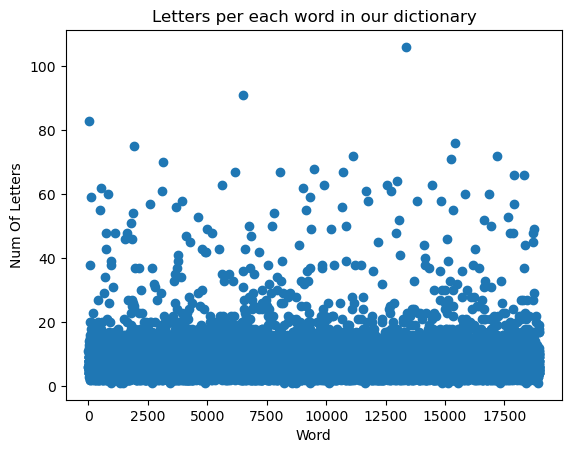

Time after first graph execute in (hh:mm:ss.ms): "0:00:03.044025"


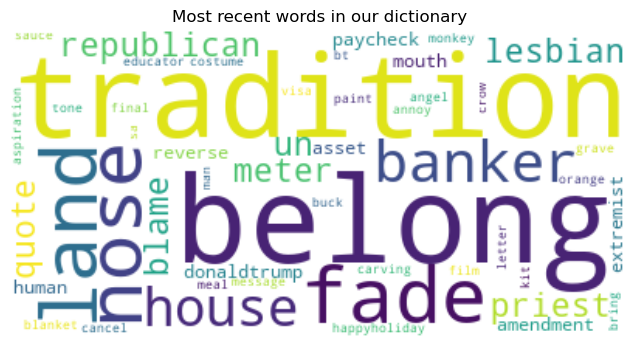

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.405433"
Time after lemmatization in (hh:mm:ss.ms): "0:00:00.113940"


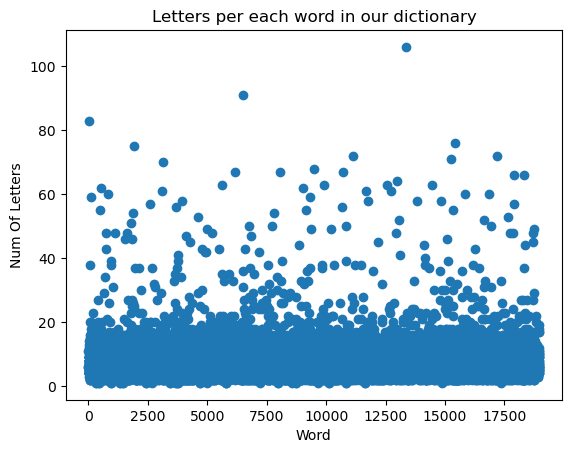

Time after first graph execute in (hh:mm:ss.ms): "0:00:02.907892"


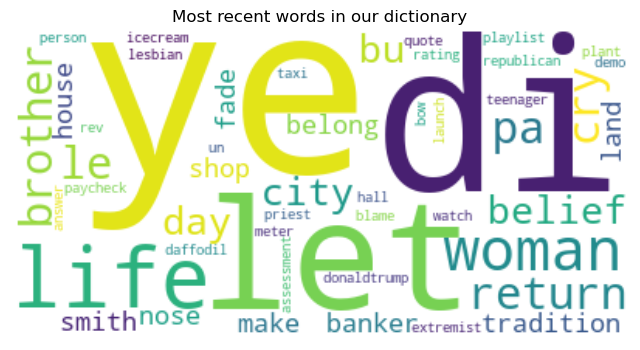

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.372127"
Time after stemming in (hh:mm:ss.ms): "0:00:00.403769"


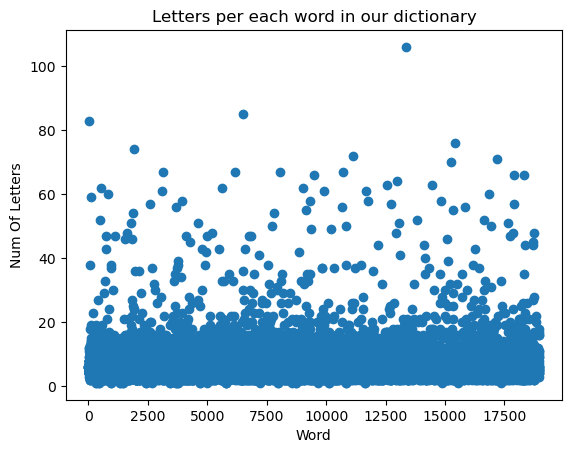

Time after first graph execute in (hh:mm:ss.ms): "0:00:02.170973"


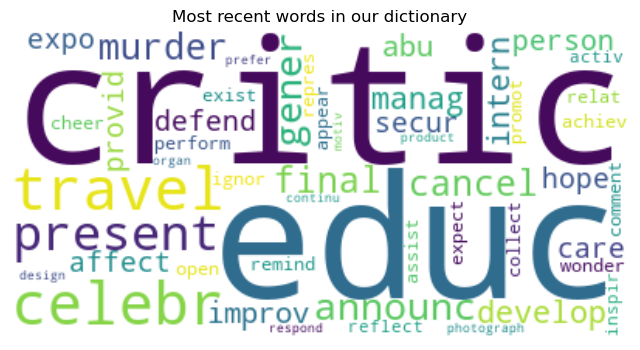

Time after wordcloud graph execute in (hh:mm:ss.ms): "0:00:00.386816"
Lenght of third dictionary is:  14289


In [7]:
#Third try



my_dict3 = myDictFunc(ttw_after_first_cleaning)

firstGraph(my_dict3)
wordcloudGraph(my_dict3)

dic_after_spelling3 = mySpeller(my_dict3)
firstGraph(dic_after_spelling3)
wordcloudGraph(dic_after_spelling3)

dic_after_lemma3 = myLemmatize(dic_after_spelling3)
firstGraph(dic_after_lemma3)
wordcloudGraph(dic_after_lemma3)

dic_after_stemm3 = myStemm(dic_after_lemma3)
firstGraph(dic_after_stemm3)
wordcloudGraph(dic_after_stemm3)

thirdDict = set(dic_after_stemm3)
print('Lenght of third dictionary is: ', len(thirdDict))

In [8]:
print('Time after whole checkings are done in (hh:mm:ss.ms): "{}"'.format(datetime.now() - start_program))

Time after whole checkings are done in (hh:mm:ss.ms): "1:02:23.620415"


# Part 2

In [9]:
import pandas as pd
import os
import collections
import time
from datetime import datetime 



### -->data

In [10]:
df = pd.read_csv('ttw2_finalspell.csv')
# wordList= ["user", "run", "love", "google","absabs"," ","#","@","best","."]
wordList= firstDict


print("data load")

data load


## Matrix Build

In [34]:
class matrix:
    def __init__(self,df,wordList,id_len=100):
        
        self.df=df
        self.wordList=wordList
        self.id_len=id_len        
  
        # Convert the dictionary into DataFrame 
        self.new_df = pd.DataFrame( [[bool(False)]*len(wordList)]*id_len )
        self.new_df.columns = wordList
        
        
        ID=0
        for tweet in df["tweet"][:id_len]:
            tokens = tweet.split()
            for token in tokens:
                if token in wordList:
                    self.new_df[token][ID]=bool(True)
            ID += 1
            
        
        #2.1.1
        print("")
        print("#2.1.1")
        self.new_df.to_csv('out.csv', index=False)
        print("file out.csv saved ")
        self.new_df.T.to_csv('out_T.csv', index=True)
        print("file out_T.csv saved ")
        
        

        
        #2.1.2
        print("")
        print("#2.1.2")
        print("File out.csv size : ",os.path.getsize('out.csv'),"Byte")
        print("File out_T.csv size : ",os.path.getsize('out_T.csv'),"Byte")
        
        
        
        #2.1.3
        print("")
        print("#2.1.3")
        
        #print(self.new_df.value_counts())
#         for word in self.new_df:
#             print(self.new_df[word].value_counts())      
                
        print("")
        print("")
        print(self.new_df.head(100))
                        
    
    def And(self, words_list=[]):
        """
        works like set operator "intersection"
        
        :param words_list: list of words to find
        :return: appearences of words_list sorted by intersection-operrator
        """
        set_dict={}
        for word in words_list:
            if word not in self.new_df:
                return "No match"

            tempData=(self.new_df[word].loc[self.new_df[word]==True]).index

            set_dict[word]=set(tempData.values)

        result=None
        
        for word in set_dict:
            if result == None:
                result = set_dict[word]

            else:
                result = (set(result)).intersection(set(set_dict[word]))
                
  
            new_result=[]
    
            for index in result:
                new_result.append(index + 1)
       
        return new_result
       
    def Or(self, words_list):
        """
        works like set operator "union"
        
        :param words_list: list of words to find
        :return: appearences of words_list sorted by union-operrator
        """
        set_dict={}
        for word in words_list:
            if word not in self.new_df:
                return "No match"
            
            tempData=(self.new_df[word].loc[self.new_df[word]==True]).index
            
            set_dict[word]=set(tempData.values)
            
            #set_dict[word]=[set(self.new_df[word])]
        
        
        result=None
        
        for word in set_dict:
            if result == None:
                result = set_dict[word]
 
            else:
                result = (set(result)).union(set(set_dict[word]))
                    
            new_result=[]
            for index in result:
                new_result.append(index + 1)
        
        return new_result
        
    def Not(self, words_list):
        """
        works like set operator "difference"
        
        :param words_list: list of words to find
        :return: appearences of words_list sorted by difference-operrator
        """
        set_dict={}
        for word in words_list:
            if word not in self.new_df:
                return "No match"
            tempData=(self.new_df[word].loc[self.new_df[word]==True]).index
            
            set_dict[word]=set(tempData.values)
            
        result=None
        
        for word in set_dict:
            if result == None:
                result = set_dict[word]
 
            else:
                result = (set(result)).difference(set(set_dict[word]))
            
            new_result=[]
            
            for index in result:
                new_result.append(index + 1)
                
        return new_result


## MATRIX Test

In [52]:
M1=matrix(df,wordList,id_len=1000)


#2.1.1
file out.csv saved 
file out_T.csv saved 

#2.1.2
File out.csv size :  79658668 Byte
File out_T.csv size :  79674817 Byte

#2.1.3


    belong  podium  thethank  colajet   sara  byproduct  \
0    False   False     False    False  False      False   
1    False   False     False    False  False      False   
2    False   False     False    False  False      False   
3    False   False     False    False  False      False   
4    False   False     False    False  False      False   
..     ...     ...       ...      ...    ...        ...   
95   False   False     False    False  False      False   
96   False   False     False    False  False      False   
97   False   False     False    False  False      False   
98   False   False     False    False  False      False   
99   False   False     False    False  False      False   

    vscocamlikelikenaturelikeforliketreedropleafblackseavscoturkeymyphotographyrizevsco  \
0                                               False       

In [36]:

print("Test AND user/user",M1.And(["user","user"]))

print("Test AND user/run",M1.And(["user","school"]))

print("Test AND run/user",M1.And(["run","user"]))

print("Test AND user/u",M1.And(["user","u"]))

print("Test AND u/user",M1.And(["u","user"]))

Test AND user/user [1, 2, 7, 10, 14, 19, 24, 25, 27, 29, 32, 33, 38, 44, 52, 53, 54, 57, 59, 62, 65, 66, 71, 74, 77, 78, 79, 81, 82, 90, 91, 93, 95, 96]
Test AND user/run [14]
Test AND run/user []
Test AND user/u []
Test AND u/user []


In [14]:
print("Test And run",M1.And(["run"]))

print("Test And user",M1.And(["user"]))

Test And run []
Test And user [1, 2, 7, 10, 14, 19, 24, 25, 27, 29, 32, 33, 38, 44, 52, 53, 54, 57, 59, 62, 65, 66, 71, 74, 77, 78, 79, 81, 82, 90, 91, 93, 95, 96]


In [15]:
print("Test OR user/user",M1.Or(["user","user"]))

print("Test OR user/run",M1.Or(["user","run"]))

print("Test OR run/user",M1.Or(["run","user"]))

print("Test OR user/u",M1.Or(["user","u"]))

print("Test OR u/user",M1.Or(["u","user"]))

Test OR user/user [1, 2, 7, 10, 14, 19, 24, 25, 27, 29, 32, 33, 38, 44, 52, 53, 54, 57, 59, 62, 65, 66, 71, 74, 77, 78, 79, 81, 82, 90, 91, 93, 95, 96]
Test OR user/run [1, 2, 7, 10, 14, 19, 24, 25, 27, 29, 32, 33, 38, 44, 52, 53, 54, 57, 59, 62, 65, 66, 71, 74, 77, 78, 79, 81, 82, 90, 91, 93, 95, 96]
Test OR run/user [1, 2, 7, 10, 14, 19, 24, 25, 27, 29, 32, 33, 38, 44, 52, 53, 54, 57, 59, 62, 65, 66, 71, 74, 77, 78, 79, 81, 82, 90, 91, 93, 95, 96]
Test OR user/u [1, 2, 4, 7, 10, 14, 19, 24, 25, 27, 29, 32, 33, 38, 44, 47, 52, 53, 54, 57, 59, 62, 65, 66, 71, 74, 77, 78, 79, 81, 82, 90, 91, 93, 95, 96, 97]
Test OR u/user [1, 2, 4, 7, 10, 14, 19, 24, 25, 27, 29, 32, 33, 38, 44, 47, 52, 53, 54, 57, 59, 62, 65, 66, 71, 74, 77, 78, 79, 81, 82, 90, 91, 93, 95, 96, 97]


In [37]:
print("Test NOT user/user",M1.Not(["user","user"]))

print("Test NOT user/run",M1.Not(["user","school"]))

print("Test NOT run/user",M1.Not(["run","user"]))

print("Test NOT user/u",M1.Not(["user","u"]))

print("Test NOT u/user",M1.Not(["u","user"]))

Test NOT user/user [1, 2, 7, 10, 14, 19, 24, 25, 27, 29, 32, 33, 38, 44, 52, 53, 54, 57, 59, 62, 65, 66, 71, 74, 77, 78, 79, 81, 82, 90, 91, 93, 95, 96]
Test NOT user/run [1, 2, 7, 10, 19, 24, 25, 27, 29, 32, 33, 38, 44, 52, 53, 54, 57, 59, 62, 65, 66, 71, 74, 77, 78, 79, 81, 82, 90, 91, 93, 95, 96]
Test NOT run/user []
Test NOT user/u [1, 2, 7, 10, 14, 19, 24, 25, 27, 29, 32, 33, 38, 44, 52, 53, 54, 57, 59, 62, 65, 66, 71, 74, 77, 78, 79, 81, 82, 90, 91, 93, 95, 96]
Test NOT u/user [97, 4, 47]


In [17]:
print("Test NOT run",M1.Not(["run"]))

print("Test NOT user",M1.Not(["user"]))

Test NOT run []
Test NOT user [1, 2, 7, 10, 14, 19, 24, 25, 27, 29, 32, 33, 38, 44, 52, 53, 54, 57, 59, 62, 65, 66, 71, 74, 77, 78, 79, 81, 82, 90, 91, 93, 95, 96]


## Reverse indexes

In [18]:
import pickle

In [40]:
class Reverse_indexes:
    def __init__(self,df,wordList,id_len):
        
        self.df=df
        self.wordList=wordList
        self.id_len=id_len
        
        self.new_df=pd.read_csv('out.csv')
        
        # {"word": [ amount, { "id": [ amount, { "place_1": place } ] } ] }
        
        word_place={}
        
        # Convert the dictionary into DataFrame
        
        #self.linked_lst = collections.deque()
        
        
        
#         ID=0
#         for tweet in df["tweet"][:id_len]:
#             ID += 1
#             total_amount=0
#             amount_per_tweet=0
            
            
            
# #             print("ID ===> ",ID)
# #             print("tweet ===> ",tweet)

            
            
            
#             if(type(tweet) != float):
#                 tokens = tweet.split()
#             #print(type(tokens))
        
            
#             for token in set(tokens):
#                 if token in wordList:
                    
#                     #
#                     # set_dict[word]=set(tempData.values)
#                     #
#                     # len(test)
#                     #
#                     # data = df.loc[df.cell == id]
#                     # rows = df.index
#                     #
#                     #
                    
#                     tempData=(self.new_df[token].loc[self.new_df[token]==True]).index
                    
#                     #list of tweets wich contains word
                    
#                     tempData=list(np.asarray(tempData) + 1)
#                     # print("tempData => ",tempData)
                    
#                     # amount of tweets wich contains word
#                     amount_per_file=len(tempData)
#                     # print("amount_per_file => ",amount_per_file)
                    

                
# #                 print(type({(np.where(np.array(tokens)==token)[0]).tolist}))
# #                 print((np.where(np.array(tokens)==token)[0]).tolist)

#         print("ver 1 Done")


#         ########################## ver 2
#         #for tweet in df["tweet"][:id_len]:
#         #print(df["tweet"][:id_len])
        
#         #print((df["tweet"][:id_len]).values)
        
#         df=df[df["tweet"].notnull()]
        
#         split_test=(df["tweet"][:id_len]).values
        
     
        
# #         print(split_test)
        
# #         print("________________________")
# #         print(type((df["tweet"][:id_len]).values))
        
# #         print("________________________")
# #         print("________________________")
# #         print(np.array_split(split_test,1))
        
# #         print("________________________")
# #         print("________________________")
# #         print("________________________")
# #         print("________________________")
# #         print(type(np.array_split(split_test,1)))
        
#         #print(' '.join(list((np.array_split(split_test,1))[0])))
#         new_word_list=set((' '.join(list((np.array_split(split_test,1))[0]))).split())
#         #TEST=set(np.split((df["tweet"][:id_len]).values))
        
#         # print(new_word_list)
        
#         #print(TEST)
    
#         print("ver 2 Done")     
        
        self.ver_3_dict={}
        for token in wordList:
                tempData=(self.new_df[token].loc[self.new_df[token]==True]).index
                    
                #list of tweets wich contains word
                tempData=list(np.asarray(tempData) + 1)
                #print("tempData => ",tempData)
                    
                # amount of tweets wich contains word
                amount_per_file=len(tempData)
                    # print("amount_per_file => ",amount_per_file)
                   
                self.ver_3_dict[token]=[len(tempData),dict.fromkeys(tempData, 0)]
                
                for place_list in self.ver_3_dict[token][1].keys():
#                     df["tweet"][place_list-1]
                    #print(df["tweet"][place_list-1])
    
                    index_list=[m.start() for m in re.finditer(token, df["tweet"][place_list-1])]
        
                    self.ver_3_dict[token][1][place_list] = [(df["tweet"][place_list-1]).count(token), index_list]
        
                    
                    #[0, 5, 10, 15]
        
        
                    #if token == "user":
                        #print(place_list)
                        
                
                        #print((df["tweet"][place_list-1]).count(token))
                
                
        #print("***********************************************************")        
        #print(self.ver_3_dict)
        print(self.ver_3_dict["user"][1])
        
        
        
                    
        print("ver 3 Done")
        
        
        
        
        
        print("#2.1.1")
        afile = open('out.pkl', 'wb')
        pickle.dump(self.ver_3_dict, afile)
        afile.close()
        print("File out.pkl saved")
        #print(self.ver_3_dict)

        print("#2.1.2")
        print("File out.pkl size : ",os.path.getsize('out.pkl'),"Byte")
        
        print("#2.1.3")
    
    
    def And(self, words_list=[]):
        """
        works like set operator "intersection"
        
        :param words_list: list of words to find
        :return: appearences of words_list sorted by intersection-operrator
        """
        set_dict={}
        for word in words_list:
            if word not in self.ver_3_dict.keys():
                return "No match"

            set_dict[word]=set(self.ver_3_dict[word][1].keys())

        result=None
        
        for word in set_dict:
            if result == None:
                result = set_dict[word]

            else:
                result = (set(result)).intersection(set(set_dict[word]))
                
  
            new_result=[]
    
            for index in result:
                new_result.append(index)
       
        return new_result
    
    def And_2(self, words_list=[]):
        """
        works like set operator "intersection"
        
        :param words_list: list of words to find
        :return: appearences of words_list sorted by intersection-operrator
        """
        set_dict={}
        word_count_dict={}
        
        for word in set(words_list):
            
            word_count_dict[word]=words_list.count(word)
            
            
            if word not in self.ver_3_dict.keys():
                return "No match"
            
            
            
            
            
            #for
#             print(self.ver_3_dict[word][1].keys())
            
            set_dict[word]=[]
            
            for key in self.ver_3_dict[word][1].keys():
                #if key+1 > self.ver_3_dict[word][1][key][0]:
                if word_count_dict[word] < self.ver_3_dict[word][1][key][0]+1:
                    set_dict[word].append(key)
                   
            
            
            
        result=None
        
        dif_word_count={}
        
        for word in set_dict:
            if result == None:
                result = set_dict[word]

            else:
                result = (set(result)).intersection(set(set_dict[word]))
                
  
            new_result=[]
    
            for index in result:
                new_result.append(index)
       
        return new_result
    
    def Or(self, words_list=[]):
        """
        works like set operator "intersection"
        
        :param words_list: list of words to find
        :return: appearences of words_list sorted by intersection-operrator
        """
        set_dict={}
        for word in words_list:
            if word not in self.ver_3_dict.keys():
                return "No match"

            set_dict[word]=set(self.ver_3_dict[word][1].keys())

        result=None
        
        for word in set_dict:
            if result == None:
                result = set_dict[word]

            else:
                result = (set(result)).union(set(set_dict[word]))
                
  
            new_result=[]
    
            for index in result:
                new_result.append(index)
       
        return new_result
    
    def Or_2(self, words_list=[]):
        """
        works like set operator "intersection"
        
        :param words_list: list of words to find
        :return: appearences of words_list sorted by intersection-operrator
        """
        set_dict={}
        word_count_dict={}
        
        for word in set(words_list):
            
            word_count_dict[word]=words_list.count(word)
            
            
            if word not in self.ver_3_dict.keys():
                return "No match"
            

            set_dict[word]=set(self.ver_3_dict[word][1].keys())
            
#             for key in self.ver_3_dict[word][1].keys():
#                 if word_count_dict[word] < self.ver_3_dict[word][1][key][0]+1:
#                     set_dict[word].append(key)
                

            
        result=None
        
        dif_word_count={}
        
        for word in set_dict:
            if result == None:
                result = set_dict[word]

            else:
                result = (set(result)).union(set(set_dict[word]))
                
  
            new_result=[]
    
            for index in result:
                new_result.append(index)
       
        return new_result
    
    
    def Not(self, words_list=[]):
        """
        works like set operator "intersection"
        
        :param words_list: list of words to find
        :return: appearences of words_list sorted by intersection-operrator
        """
        set_dict={}
        word_count_dict={}
        for word in set(words_list):
            word_count_dict[word]=words_list.count(word)
            if word not in self.ver_3_dict.keys():
                set_dict[word]=[]
            else:
                set_dict[word]=set(self.ver_3_dict[word][1].keys())
                if words_list.count(word) > 1:
                    set_dict[word]=[]
                

        result=None
        
        for word in set_dict:
            if result == None:
                result = set_dict[word]

            else:
                result = (set(result)).difference(set(set_dict[word]))
                
  
            new_result=[]
    
            for index in result:
                new_result.append(index)
       
        return new_result
    
    def Not_2(self, words_list=[]):
        """
        works like set operator "intersection"
        
        :param words_list: list of words to find
        :return: appearences of words_list sorted by intersection-operrator
        """
        set_dict={}
        word_count_dict={}
        for word in set(words_list):
            word_count_dict[word]=words_list.count(word)
            if word not in self.ver_3_dict.keys():
                set_dict[word]=[]
            else:
                set_dict[word]=set(self.ver_3_dict[word][1].keys())
                if words_list.count(word) > 1:
                    set_dict[word]=[]
            
        result=None
        
        dif_word_count={}
        
        for word in set_dict:
            if result == None:
                result = set_dict[word]

            else:
                result = (set(result)).difference(set(set_dict[word]))
                
  
            new_result=[]
    
            for index in result:
                new_result.append(index)
       
        return new_result
                    



In [53]:
R1=Reverse_indexes(df,wordList,1000)

{1: [1, [0]], 2: [2, [0, 5]], 7: [8, [0, 22, 27, 32, 37, 42, 47, 52]], 10: [2, [0, 5]], 14: [1, [0]], 19: [2, [21, 26]], 24: [2, [0, 5]], 25: [6, [0, 5, 10, 15, 20, 25]], 27: [1, [0]], 29: [1, [18]], 32: [4, [0, 5, 10, 15]], 33: [1, [0]], 38: [1, [0]], 44: [1, [20]], 52: [1, [4]], 53: [1, [24]], 54: [1, [0]], 57: [1, [0]], 59: [1, [0]], 62: [1, [45]], 65: [1, [0]], 66: [1, [0]], 71: [1, [0]], 74: [1, [0]], 77: [5, [0, 14, 22, 27, 32]], 78: [2, [0, 40]], 79: [2, [0, 5]], 81: [2, [0, 5]], 82: [3, [0, 30, 43]], 90: [2, [22, 27]], 91: [2, [0, 29]], 93: [1, [44]], 95: [1, [57]], 96: [1, [0]], 103: [4, [0, 5, 10, 15]], 108: [1, [13]], 109: [1, [12]], 110: [1, [0]], 112: [1, [0]], 114: [1, [12]], 115: [6, [0, 5, 29, 34, 39, 44]], 123: [2, [0, 5]], 130: [1, [0]], 138: [1, [0]], 141: [1, [0]], 142: [1, [19]], 144: [1, [0]], 148: [3, [6, 11, 28]], 149: [2, [0, 37]], 155: [3, [0, 5, 10]], 162: [3, [28, 33, 38]], 166: [1, [21]], 167: [1, [0]], 168: [3, [0, 5, 27]], 172: [1, [0]], 173: [2, [0, 5]],

In [48]:
print("Test AND_2 user/user",R1.And_2(["user","user"]))

Test AND_2 user/user [2, 7, 10, 19, 24, 25, 32, 77, 78, 79, 81, 82, 90, 91]


In [43]:
print("Test AND_2 user*4",R1.And_2(["user","user","user","user"]))

Test AND_2 user*4 [7, 25, 32, 77]


In [23]:
print("Test AND_2 user*4 and danny",R1.And_2(["user","user","user","user","danny"]))

Test AND_2 user*4 and danny [7]


In [24]:


print("Test AND user/run",R1.And(["user","school"]))

print("Test AND run/user",R1.And(["school","user"]))

print("Test AND user/u",R1.And(["user","u"]))

print("Test AND u/user",R1.And(["u","user"]))

Test AND user/run [14]
Test AND run/user [14]
Test AND user/u []
Test AND u/user []


In [25]:
print("Test And run",R1.And(["school"]))


Test And run [8, 14]


In [26]:
print("Test OR user*4 and danny",R1.Or(["user","user","user","user","danny"]))

Test OR user*4 and danny [1, 2, 7, 10, 14, 19, 24, 25, 27, 29, 32, 33, 38, 44, 52, 53, 54, 57, 59, 62, 65, 66, 71, 74, 77, 78, 79, 81, 82, 90, 91, 93, 95, 96]


In [27]:
print("Test OR  danny",R1.Or(["danny"]))
print("Test OR user*4",R1.Or(["user","user","user","user"]))

Test OR  danny [7]
Test OR user*4 [1, 2, 7, 10, 14, 19, 24, 25, 27, 29, 32, 33, 38, 44, 52, 53, 54, 57, 59, 62, 65, 66, 71, 74, 77, 78, 79, 81, 82, 90, 91, 93, 95, 96]


In [28]:
print("Test OR_2  danny",R1.Or_2(["danny"]))
print("Test OR_2 user*2",R1.Or_2(["user","user"]))
print("Test OR_2 user*3",R1.Or_2(["user","user","user"]))
print("Test OR_2 user*4",R1.Or_2(["user","user","user","user"]))

Test OR_2  danny [7]
Test OR_2 user*2 [1, 2, 7, 10, 14, 19, 24, 25, 27, 29, 32, 33, 38, 44, 52, 53, 54, 57, 59, 62, 65, 66, 71, 74, 77, 78, 79, 81, 82, 90, 91, 93, 95, 96]
Test OR_2 user*3 [1, 2, 7, 10, 14, 19, 24, 25, 27, 29, 32, 33, 38, 44, 52, 53, 54, 57, 59, 62, 65, 66, 71, 74, 77, 78, 79, 81, 82, 90, 91, 93, 95, 96]
Test OR_2 user*4 [1, 2, 7, 10, 14, 19, 24, 25, 27, 29, 32, 33, 38, 44, 52, 53, 54, 57, 59, 62, 65, 66, 71, 74, 77, 78, 79, 81, 82, 90, 91, 93, 95, 96]


In [29]:
print("Test OR_2 user*4 and danny",R1.Or_2(["user","user","user","user","vendor"]))

Test OR_2 user*4 and danny [1, 2, 7, 10, 14, 19, 24, 25, 26, 27, 29, 32, 33, 38, 44, 52, 53, 54, 57, 59, 62, 65, 66, 71, 74, 77, 78, 79, 81, 82, 90, 91, 93, 95, 96]


In [30]:
print("Test NOT user*4 and danny",R1.Not(["user","user","user","user","vendor"]))

Test NOT user*4 and danny []


In [31]:
print("Test NOT_2 user*4 and danny",R1.Not_2(["user","user","user","user","vendor"]))

Test NOT_2 user*4 and danny []


In [32]:


print("Test NOT_2 user ",R1.Not_2(["user"]))
print("Test NOT_2 vendor ",R1.Not_2(["vendor"]))
print("Test NOT_2 comment ",R1.Not_2(["comment"]))
print("Test NOT_2 school ",R1.Not_2(["school"]))
print("")
print("Test NOT_2 user*4 and vendor comment school ",R1.Not_2(["user","vendor","comment","school"]))

Test NOT_2 user  [1, 2, 7, 10, 14, 19, 24, 25, 27, 29, 32, 33, 38, 44, 52, 53, 54, 57, 59, 62, 65, 66, 71, 74, 77, 78, 79, 81, 82, 90, 91, 93, 95, 96]
Test NOT_2 vendor  [26]
Test NOT_2 comment  [15]
Test NOT_2 school  [8, 14]

Test NOT_2 user*4 and vendor comment school  [1, 2, 7, 10, 19, 24, 25, 27, 29, 32, 33, 38, 44, 52, 53, 54, 57, 59, 62, 65, 66, 71, 74, 77, 78, 79, 81, 82, 90, 91, 93, 95, 96]
